                                                    Proyecto individual nro 1

In [22]:
#Importamos las librerias necesarias
import pandas as pd
import ast

Lecturas y transformaciones de los datos.

In [3]:
#Leer y cargar el archivo JSON:
#Abrimos el archivo JSON y lo leemos línea por línea. Utilizamos ast.literal_eval para convertir cada línea en un diccionario y lo agregamos a la lista rows.
rows = []

with open("PI MLOps - STEAM-20230828T154746Z-001/australian_user_reviews.json", encoding='MacRoman') as f:
    for line in f.readlines():
        rows.append(ast.literal_eval(line))

#Creamos un DataFrame llamado df_reviews a partir de la lista rows. Este DataFrame contiene los datos anidados del archivo JSON.
df_reviews = pd.DataFrame(rows)

In [5]:
#Analizamos la estructura del dataset reviews
df_reviews

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


In [6]:
#Importo la libreria textblob para realizar un analisis de sentimiento sobre df_reviews.reviews
from textblob import TextBlob

In [7]:
#Definimos la función para determinar si la review de los usuarios es negativa, neutral y positiva, y luego colocamos en una nueva columna 'sentiment_analysis' 0,1,2 respectivamente

def sentiment_analysis(review):
    if isinstance(review, list) and len(review) > 0:
        text = review[0].get('review', '')  # Obtener el texto de la reseña
        sentiment = TextBlob(text).sentiment.polarity

        if sentiment < -0.2:
            return 0  # Malo
        elif sentiment >= -0.2 and sentiment <= 0.2:
            return 1  # Neutral
        else:
            return 2  # Positivo
    else:
        return 1  # Valor predeterminado para reseñas faltantes

In [8]:
# Aplicar la función a la columna 'reviews' y crear la nueva columna 'sentiment_analysis'
df_reviews['sentiment_analysis'] = df_reviews['reviews'].apply(sentiment_analysis)

In [9]:
df_reviews

,user_id,user_url,reviews,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2...",1
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014...",1
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',...",2
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2...",2
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',...",1
...,...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la...",2
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l...",1
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',...",1
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l...",2


In [10]:
#data_desanidades una lista que usamos para almacenar los datos desanidados de las reseñas y otros detalles.

data_desanidada = []

#Itera sobre las filas del DataFrame df_reviews, donde index es el índice de la fila y row es un objeto que contiene los valores de cada columna en esa fila.

for index, row in df_reviews.iterrows():
    user_id = row['user_id']
    user_url = row['user_url']
    sentiment_analysis_value = row['sentiment_analysis']  # Obtener el valor de sentiment_analysis
    reviews = row['reviews']

#El siguiente bucle for i in reviews: itera sobre cada reviews en la lista de reviews para esa fila.
    
    for i in reviews:   

    #Es un diccionario que almacena todos los valores relevantes de la fila actual, incluidos los valores de reseñas desanidadas
    # y el resultado del análisis de sentimiento calculado con la función sentiment_analysis.    
        
        new_row = {
            'user_id': user_id,
            'user_url': user_url,
            'reviews': reviews,
            'sentiment_analysis': sentiment_analysis_value,  
            'funny': i.get('funny', ''),
            'posted': i.get('posted', ''),
            'last_edited': i.get('last_edited', ''),
            'item_id': i.get('item_id', ''),
            'helpful': i.get('helpful', ''),
            'recommend': i.get('recommend', False),  
            'review': i.get('review', '')
        }
    # agrega el diccionario new_row a la lista data_desanidada.    
        data_desanidada.append(new_row)

# Crear un DataFrame a partir de la lista data_desanidada
df_reviews_desanidada = pd.DataFrame(data_desanidada)


In [11]:
#Eliminarmos las columnas innecesarias.
df_reviews_desanidada.drop(['reviews', 'helpful', 'review','last_edited','funny'], axis=1, inplace=True)

In [15]:
df_reviews_desanidada

,user_id,user_url,sentiment_analysis,posted,item_id,recommend
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1,"Posted November 5, 2011.",1250,True
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1,"Posted July 15, 2011.",22200,True
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1,"Posted April 21, 2011.",43110,True
3,js41637,http://steamcommunity.com/id/js41637,1,"Posted June 24, 2014.",251610,True
4,js41637,http://steamcommunity.com/id/js41637,1,"Posted September 8, 2013.",227300,True
...,...,...,...,...,...,...
59300,76561198312638244,http://steamcommunity.com/profiles/76561198312...,2,Posted July 10.,70,True
59301,76561198312638244,http://steamcommunity.com/profiles/76561198312...,2,Posted July 8.,362890,True
59302,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,1,Posted July 3.,273110,True
59303,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,1,Posted July 20.,730,True


In [ ]:
df_reviews_desanidada

In [ ]:

#Cambiamos el formato de fecha

from dateutil import parser


# Función para analizar la fecha y manejar errores
def parse_date(date_str):
    try:
        return parser.parse(date_str.replace("Posted ", ""), fuzzy=True)
    except ValueError:
        return None

# Aplicar la función de análisis de fecha y reemplazar filas con fechas incorrectas con NaN
df_reviews_desanidada['posted'] = df_reviews_desanidada['posted'].apply(parse_date)

# Eliminar filas con fechas incorrectas (NaN en la columna "posted")
df_reviews_desanidada = df_reviews_desanidada.dropna(subset=['posted'])

# Ahora, la columna "posted" contiene las fechas en el formato deseado y se han eliminado las filas con fechas incorrectas



In [26]:
df_reviews_desanidada

,user_id,user_url,sentiment_analysis,posted,item_id,recommend
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1,2011-11-05,1250,True
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1,2011-07-15,22200,True
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1,2011-04-21,43110,True
3,js41637,http://steamcommunity.com/id/js41637,1,2014-06-24,251610,True
4,js41637,http://steamcommunity.com/id/js41637,1,2013-09-08,227300,True
...,...,...,...,...,...,...
59300,76561198312638244,http://steamcommunity.com/profiles/76561198312...,2,2023-07-10,70,True
59301,76561198312638244,http://steamcommunity.com/profiles/76561198312...,2,2023-07-08,362890,True
59302,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,1,2023-07-03,273110,True
59303,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,1,2023-07-20,730,True


In [27]:
rows1 = []  # Se crea una lista vacía llamada rows1. Esta lista se utilizará para almacenar los datos leídos del archivo JSON.

# Abre el archivo JSON llamado "australian_users_items.json"

with open("PI MLOps - STEAM-20230828T154746Z-001/australian_users_items.json", encoding='MacRoman') as f:
    
    # Se itera a través de cada línea del archivo y se devuelve una lista de cadenas (una cadena por línea)
    
    for line in f.readlines():
     
        # Cada línea se evalúa utilizando la función ast.literal_eval()
      
        rows1.append(ast.literal_eval(line))

# Carga los datos en un DataFrame.

df_items = pd.DataFrame(rows1)

In [28]:
df_items

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."
...,...,...,...,...,...
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...,"[{'item_id': '413850', 'item_name': 'CS:GO Pla..."
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...,"[{'item_id': '11020', 'item_name': 'TrackMania..."
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,[]
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'..."


In [29]:

# Creamos una lista para almacenar los datos desanidados
data_desanidada = []

# Iterar sobre cada fila del DataFrame original
for index, row in df_items.iterrows():
    user_id = row['user_id']
    steam_id = row['steam_id']
    user_url = row['user_url']
    
    # Iterar sobre cada elemento en la lista 'items' de la fila actual
    for item in row['items']:
        new_row = {
            'user_id': user_id,
            'steam_id': steam_id,
            'user_url': user_url,
            'item_id': item['item_id'],
            'item_name': item['item_name'],
            'playtime_forever': item['playtime_forever'],
            'playtime_2weeks': item['playtime_2weeks']
        }
        
        data_desanidada.append(new_row)

# Crear un nuevo DataFrame a partir de la lista desanidada
df_items_desanidado = pd.DataFrame(data_desanidada)




In [30]:
#Vemos el dataframe modificado.

df_items_desanidado

,user_id,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6,0
1,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,20,Team Fortress Classic,0,0
2,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,30,Day of Defeat,7,0
3,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,40,Deathmatch Classic,0,0
4,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,50,Half-Life: Opposing Force,0,0
...,...,...,...,...,...,...,...
5153204,76561198329548331,76561198329548331,http://steamcommunity.com/profiles/76561198329...,346330,BrainBread 2,0,0
5153205,76561198329548331,76561198329548331,http://steamcommunity.com/profiles/76561198329...,373330,All Is Dust,0,0
5153206,76561198329548331,76561198329548331,http://steamcommunity.com/profiles/76561198329...,388490,One Way To Die: Steam Edition,3,3
5153207,76561198329548331,76561198329548331,http://steamcommunity.com/profiles/76561198329...,521570,You Have 10 Seconds 2,4,4


In [32]:
  #Lee el archivo output_steam_games y carga los datos en un dataframe
df_steam_games= pd.read_json("PI MLOps - STEAM-20230828T154746Z-001/output_steam_games.json", lines = True)

In [33]:
# Eliminar registros con valores NaN en todos los campos
df_steam_games.dropna(how='all', inplace=True)

In [34]:
# Vemos el dataframe con los valores eliminados.
df_steam_games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140.0,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,0.0,643980.0,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,0.0,670290.0,Poolians.com
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,0.0,767400.0,彼岸领域
88314,None,None,Log Challenge,None,http://store.steampowered.com/app/773570/Log_C...,None,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,0.0,773570.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,0.0,773640.0,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530.0,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,"xropi,stev3ns"


In [ ]:
#Convierte en 0 los registros que no posean id
df_steam_games['id'] = df_steam_games['id'].fillna(0).astype(int)

In [49]:
#Convierte en enteros, los id del df_steam
df_steam_games['id'] = df_steam_games['id'].astype(int)

In [50]:
df_steam_games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,0.0,643980,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,0.0,670290,Poolians.com
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,0.0,767400,彼岸领域
88314,None,None,Log Challenge,None,http://store.steampowered.com/app/773570/Log_C...,None,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,0.0,773570,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,0.0,773640,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870,"xropi,stev3ns"


In [51]:
#Guardo los DataFrame nuevos en formato CSV y parquet.




df_steam_games.to_csv('./data/steam_games.csv', index=False)

df_reviews_desanidada.to_csv('./data/reviews.csv', index=False)

df_items_desanidado.to_parquet('./data/items.parquet', index=False)




In [ ]:
# Leo los archivos 


df_steam = pd.read_csv('./data/steam_games.csv')

df_items = pd.read_parquet('./data/items.parquet')

df_reviews = pd.read_csv('./data/reviews.csv')

In [4]:
df_reviews

,user_id,user_url,sentiment_analysis,posted,item_id,recommend
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1,2011-11-05,1250,True
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1,2011-07-15,22200,True
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1,2011-04-21,43110,True
3,js41637,http://steamcommunity.com/id/js41637,1,2014-06-24,251610,True
4,js41637,http://steamcommunity.com/id/js41637,1,2013-09-08,227300,True
...,...,...,...,...,...,...
59300,76561198312638244,http://steamcommunity.com/profiles/76561198312...,2,2023-07-10,70,True
59301,76561198312638244,http://steamcommunity.com/profiles/76561198312...,2,2023-07-08,362890,True
59302,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,1,2023-07-03,273110,True
59303,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,1,2023-07-20,730,True


In [5]:
df_items

,user_id,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6,0
1,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,20,Team Fortress Classic,0,0
2,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,30,Day of Defeat,7,0
3,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,40,Deathmatch Classic,0,0
4,76561197970982479,76561197970982479,http://steamcommunity.com/profiles/76561197970...,50,Half-Life: Opposing Force,0,0
...,...,...,...,...,...,...,...
5153204,76561198329548331,76561198329548331,http://steamcommunity.com/profiles/76561198329...,346330,BrainBread 2,0,0
5153205,76561198329548331,76561198329548331,http://steamcommunity.com/profiles/76561198329...,373330,All Is Dust,0,0
5153206,76561198329548331,76561198329548331,http://steamcommunity.com/profiles/76561198329...,388490,One Way To Die: Steam Edition,3,3
5153207,76561198329548331,76561198329548331,http://steamcommunity.com/profiles/76561198329...,521570,You Have 10 Seconds 2,4,4


In [6]:
df_steam

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,0.0,761140,Kotoshiro
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,0.0,643980,Secret Level SRL
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,0.0,670290,Poolians.com
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,0.0,767400,彼岸领域
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"['Action', 'Indie', 'Casual', 'Sports']",http://steamcommunity.com/app/773570/reviews/?...,"['Single-player', 'Full controller support', '...",2.99,0.0,773570,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32130,Ghost_RUS Games,"['Casual', 'Indie', 'Simulation', 'Strategy']",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"['Strategy', 'Indie', 'Casual', 'Simulation']",http://steamcommunity.com/app/773640/reviews/?...,"['Single-player', 'Steam Achievements']",1.99,0.0,773640,"Nikita ""Ghost_RUS"""
32131,Sacada,"['Casual', 'Indie', 'Strategy']",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"['Strategy', 'Indie', 'Casual']",http://steamcommunity.com/app/733530/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",4.99,0.0,733530,Sacada
32132,Laush Studio,"['Indie', 'Racing', 'Simulation']",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"['Indie', 'Simulation', 'Racing']",http://steamcommunity.com/app/610660/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",1.99,0.0,610660,Laush Dmitriy Sergeevich
32133,SIXNAILS,"['Casual', 'Indie']",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"['Indie', 'Casual', 'Puzzle', 'Singleplayer', ...",http://steamcommunity.com/app/658870/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",4.99,0.0,658870,"xropi,stev3ns"


Realizamos un analisis exploratorio de datos

In [23]:

#Averiguamos los 3 juegos mas recomendados.

# Filtramos solo las filas con recommend=True
df_reviews_true = df_reviews[df_reviews['recommend']]

#Contamos la cantidad de recomendaciones por item_id
recomendaciones_por_item = df_reviews_true.groupby('item_id')['recommend'].count().reset_index()

#Ordenamos en orden descendente
recomendaciones_por_item = recomendaciones_por_item.sort_values(by='recommend', ascending=False)

#Tomamos los tres primeros ítems
top_3_recomendados = recomendaciones_por_item.head(3)

#Combinamos con df_steam para obtener los nombres de los ítems

top_3_mas_recomendados = pd.merge(top_3_recomendados, df_steam[['id', 'app_name']], left_on='item_id', right_on='id', how='left')


print(top_3_mas_recomendados )


   item_id  recommend    id                          app_name
0      440       3611   440                   Team Fortress 2
1      730       3478   730  Counter-Strike: Global Offensive
2     4000       1685  4000                       Garry's Mod


In [24]:
import matplotlib.pyplot as plt

In [25]:
#Informaremos los juegos con mayor tiempo jugado
top_juegos_jugados = df_items.sort_values(by='playtime_forever', ascending=False).head(10)

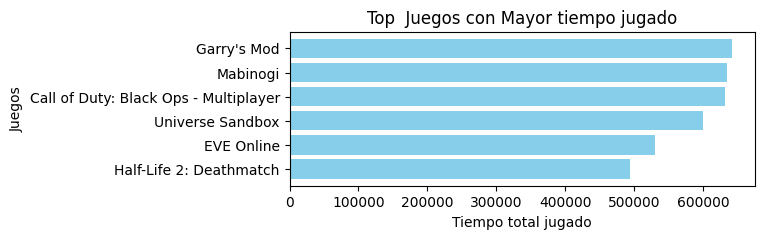

In [26]:
plt.figure(figsize=(6, 2))  # Ajusta el tamaño del gráfico..

# Graficar los datos
plt.barh(top_juegos_jugados['item_name'], top_juegos_jugados['playtime_forever'], color='skyblue')
plt.xlabel('Tiempo total jugado')  # Etiqueta del eje X
plt.ylabel('Juegos')         # Etiqueta del eje Y
plt.title('Top  Juegos con Mayor tiempo jugado')  # Título del gráfico

plt.gca().invert_yaxis()  # Invertir el eje Y para que el juego con más tiempo jugado esté en la parte superior.

# Mostrar el gráfico
plt.show()

In [27]:

#Veremos en que mes se lanzan mas juegos 

# Copia el DataFrame original df_steam
df_steam_copia = df_steam.copy()

# Convierte la columna "release_date" al formato de fecha y elimina las filas con NaN
df_steam_copia['release_date'] = pd.to_datetime(df_steam_copia['release_date'], errors='coerce')

# Crea una nueva columna "release_month" que contiene el mes de lanzamiento
df_steam_copia['release_month'] = df_steam_copia['release_date'].dt.to_period('M')

# Realiza el cálculo de la cantidad de juegos lanzados por mes
cantidad_juegos_por_mes = df_steam_copia.groupby('release_month').size().reset_index(name='cantidad_juegos')

# Ahora tienes la cantidad de juegos lanzados por mes en el DataFrame cantidad_juegos_por_mes
print(cantidad_juegos_por_mes)





    release_month  cantidad_juegos
0         1970-07                1
1         1970-12                1
2         1975-12                1
3         1980-01                1
4         1981-01                2
..            ...              ...
353       2018-12                6
354       2019-05                1
355       2019-09                1
356       2019-12                1
357       2021-12                1

[358 rows x 2 columns]


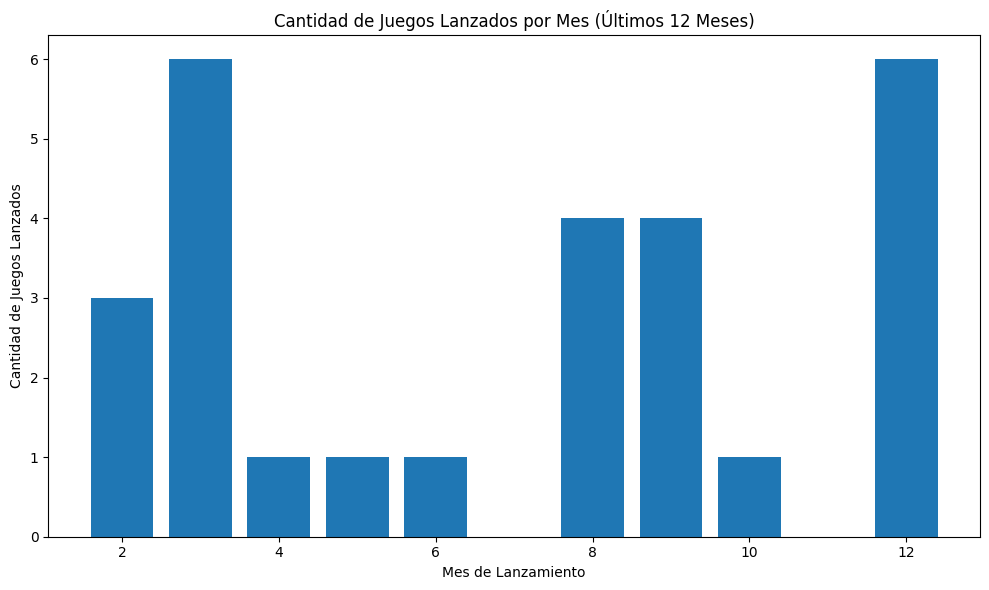

In [28]:


# Selecciona los últimos 12 meses
ultimos_12_meses = cantidad_juegos_por_mes[-12:]

# Crea un gráfico de barras apiladas
plt.figure(figsize=(10, 6))

# Extrae los meses y la cantidad de juegos, convirtiendo los meses a formato numérico
meses = ultimos_12_meses['release_month'].dt.month.astype(int)
cantidad_juegos = ultimos_12_meses['cantidad_juegos']

# Crea el gráfico de barras
plt.bar(meses, cantidad_juegos)

# Configura el eje x para que muestre los meses de forma legible
plt.xlabel('Mes de Lanzamiento')
plt.ylabel('Cantidad de Juegos Lanzados')
plt.title('Cantidad de Juegos Lanzados por Mes (Últimos 12 Meses)')

# Muestra el gráfico
plt.tight_layout()
plt.show()



Tomamos una muestra aleatoria para probar la funcion que recomienda juegos segun su id de juego, basado en los tags y generos similares.

In [17]:



# Especifica el tamaño de la muestra
tamano_muestra = 100  

# Toma una muestra aleatoria del DataFrame original
muestra_aleatoria = df_steam.sample(n=tamano_muestra, random_state=42)  




In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity



# Obtén el juego con el item_id proporcionado por el usuario
user_item_id = 10  # Reemplaza con el item_id proporcionado por el usuario
target_game = muestra_aleatoria[muestra_aleatoria['id'] == user_item_id]

# Combina las etiquetas (tags) y géneros en una sola cadena de texto
# Limpia los valores nulos en las columnas 'tags' y 'genres' y convierte todo a cadenas de texto
target_game_tags_and_genres = ' '.join(target_game['tags'].fillna('').astype(str) + ' ' + target_game['genres'].fillna('').astype(str))

# Crea un vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Aplica el vectorizador al juego de referencia y a todos los juegos
# Limpia los valores nulos en las columnas 'tags' y 'genres' y convierte todo a cadenas de texto
muestra_aleatoria['tags_and_genres'] = muestra_aleatoria['tags'].fillna('').astype(str) + ' ' + muestra_aleatoria['genres'].fillna('').astype(str)
tfidf_matrix = tfidf_vectorizer.fit_transform([target_game_tags_and_genres] + muestra_aleatoria['tags_and_genres'].tolist())

# Calcula la similitud entre el juego de referencia y todos los demás juegos
similarity_matrix = cosine_similarity(tfidf_matrix)

# Ordena los juegos por similitud y obtén los índices de los juegos más similares
similar_games_indices = similarity_matrix[0].argsort()[::-1]

# Recomienda los juegos más similares (puedes ajustar el número de recomendaciones)
num_recommendations = 5
recommended_games = muestra_aleatoria.reset_index(drop=True).loc[similar_games_indices[1:num_recommendations + 1]]
# Devuelve la lista de juegos recomendados


In [21]:
recommended_games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer,tags_and_genres
36,Degica,['Utilities'],DigiFish Aqua Real 2,DigiFish Aqua Real 2,http://store.steampowered.com/app/372060/DigiF...,2015-06-10,"['Utilities', 'Casual', 'Simulation']",http://steamcommunity.com/app/372060/reviews/?...,NaN,9.99,0.0,372060,Formosoft International,"['Utilities', 'Casual', 'Simulation'] ['Utilit..."
26,Northway Games,"['Indie', 'Simulation', 'Strategy']",Rebuild 3: Gangs of Deadsville,Rebuild 3: Gangs of Deadsville,http://store.steampowered.com/app/257170/Rebui...,2015-05-29,"['Strategy', 'Zombies', 'Simulation', 'Surviva...",http://steamcommunity.com/app/257170/reviews/?...,"['Single-player', 'Steam Achievements', 'Steam...",14.99,0.0,257170,"Northway Games,Sarah Northway","['Strategy', 'Zombies', 'Simulation', 'Surviva..."
27,Dovetail Games - Trains,['Simulation'],Train Simulator: BR Class 73 'Gatwick Express'...,Train Simulator: BR Class 73 'Gatwick Express'...,http://store.steampowered.com/app/258659/Train...,2016-02-18,['Simulation'],http://steamcommunity.com/app/258659/reviews/?...,"['Single-player', 'Downloadable Content', 'Ste...",19.99,0.0,258659,Dovetail Games,['Simulation'] ['Simulation']
28,Dusenberry Martin Racing,['Racing'],Paint Scheme Pack 1,Paint Scheme Pack 1,http://store.steampowered.com/app/525182/Paint...,2016-09-13,['Racing'],http://steamcommunity.com/app/525182/reviews/?...,"['Single-player', 'Online Multi-Player', 'Down...",4.99,0.0,525182,Monster Games,['Racing'] ['Racing']
29,PolyDigital,"['Indie', 'Sports']",Bunny Hop League,Bunny Hop League,http://store.steampowered.com/app/429780/Bunny...,2017-04-27,"['Indie', 'Sports', 'Fast-Paced', 'Parkour', '...",http://steamcommunity.com/app/429780/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",5.99,0.0,429780,PolyDigital,"['Indie', 'Sports', 'Fast-Paced', 'Parkour', '..."


Creamos el endpoint de recomendacion_juego

In [ ]:
from fastapi import FastAPI

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


app2 = FastAPI()

# Cargar el DataFrame df_steam desde tu archivo CSV
df_steam = pd.read_csv('./Data/steam_games.csv')

@app2.get("/recomendacion_juego/{product_id}")
async def recomendacion_juego(product_id: int):
    try:
        # Obtén el juego de referencia
        target_game = df_steam[df_steam['id'] == product_id]

        if target_game.empty:
            return {"message": "No se encontró el juego de referencia."}

        # Combina las etiquetas (tags) y géneros en una sola cadena de texto
        target_game_tags_and_genres = ' '.join(target_game['tags'].fillna('').astype(str) + ' ' + target_game['genres'].fillna('').astype(str))

        # Crea un vectorizador TF-IDF
        tfidf_vectorizer = TfidfVectorizer()

        # Configura el tamaño del lote para la lectura de juegos
        chunk_size = 100  # Tamaño del lote 
        similarity_scores = None

        # Procesa los juegos por lotes utilizando chunks
        for chunk in pd.read_csv('./Data/steam_games.csv', chunksize=chunk_size):
            # Combina las etiquetas (tags) y géneros de los juegos en una sola cadena de texto
            chunk_tags_and_genres = ' '.join(chunk['tags'].fillna('').astype(str) + ' ' + chunk['genres'].fillna('').astype(str))

            # Aplica el vectorizador TF-IDF al lote actual de juegos y al juego de referencia
            tfidf_matrix = tfidf_vectorizer.fit_transform([target_game_tags_and_genres, chunk_tags_and_genres])

            # Calcula la similitud entre el juego de referencia y los juegos del lote actual
            if similarity_scores is None:
                similarity_scores = cosine_similarity(tfidf_matrix)
            else:
                similarity_scores = cosine_similarity(tfidf_matrix, X=similarity_scores)

        if similarity_scores is not None:
            # Obtiene los índices de los juegos más similares
            similar_games_indices = similarity_scores[0].argsort()[::-1]

            # Recomienda los juegos más similares (puedes ajustar el número de recomendaciones)
            num_recommendations = 5
            recommended_games = df_steam.loc[similar_games_indices[1:num_recommendations + 1]]

            # Devuelve la lista de juegos recomendados
            return recommended_games[['app_name', 'tags', 'genres']].to_dict(orient='records')

        return {"message": "No se encontraron juegos similares."}

    except Exception as e:
        return {"message": f"Error: {str(e)}"}


Creacion de la funcion userdata la cual devuelve cantidad de dinero gastado por el usuario, el porcentaje de recomendación en base a reviews.recommend y cantidad de items.

In [39]:

def userdata(user_id):
    # Filtra las revisiones del usuario específico
    user_reviews = df_reviews[df_reviews['user_id'] == user_id]
    
    # Filtra los juegos jugados por el usuario
    game_ids = user_reviews['item_id'].unique()
    user_steam_games = df_steam[df_steam['id'].astype(int).isin(game_ids)]
    
    # Calcula la cantidad de dinero gastado por el usuario
    user_steam_games.loc[:, 'price'] = user_steam_games['price'].str.replace('$', '').astype(float)
    money_spent = user_steam_games['price'].sum()
    
    # Calcula el porcentaje de recomendación promedio de los juegos jugados por el usuario
    user_reviews.loc[:, 'recommend'] = user_reviews['recommend'].astype(bool)
    recommend_percentage = user_reviews['recommend'].mean() * 100
    
    # Calcula la cantidad de items que posee el usuario
    num_items = len(game_ids)
    
    # Crear un diccionario con los resultados
    user_data = {
        "money_spent": money_spent,
        "recommend_percentage": recommend_percentage,
        "num_items": num_items
    }
    
    return user_data



Probamos la funcción

In [41]:
# Reemplazar "tu_user_id_aqui" con el ID del usuario que deseas consultar
user_id = "js41637"

# Llama a la función userdata con el user_id específico
resultado_usuario = userdata(user_id)

# Imprime los resultados
print("Cantidad de dinero gastado:", resultado_usuario["money_spent"])
print("Porcentaje de recomendación:", resultado_usuario["recommend_percentage"])
print("Cantidad de items:", resultado_usuario["num_items"])

Cantidad de dinero gastado: 29.979999999999997
Porcentaje de recomendación: 100.0
Cantidad de items: 3


Creamos el endpoint de userdata.

In [43]:
app = FastAPI()

@app.get("/userdata/{user_id}")
async def userdata(user_id: str):
    try:
        Cantidad = 0
        recommend_count = 0
        total_reviews = 0
        item_ids = set()

        # Lote para la lectura de reviews
        chunk_size = 100000
        user_reviews_generator = pd.read_csv('./Data/reviews.csv', chunksize=chunk_size)

        for chunk in user_reviews_generator:
            user_reviews = chunk[chunk['user_id'] == user_id]

            # Procesa los datos del lote actual
            Cantidad += user_reviews.merge(df_steam[['id', 'price']], left_on='item_id', right_on='id', how='inner')['price'].sum()
            recommend_count += user_reviews['recommend'].sum()
            total_reviews += len(user_reviews)
            item_ids.update(user_reviews['item_id'].unique())

        #Calcula el porcentage de recomendaciones
        if total_reviews > 0:
            porcentaje = (recommend_count / total_reviews) * 100
        else:
            porcentaje = 0
        #Cuenta los numeros de items
        cantidad_de_items = len(item_ids)

        user_data = {
            "Cantidad de dinero gastado": Cantidad,
            "recommend_porcentaje": porcentaje,
            "cantidad de items": cantidad_de_items
        }

        return user_data

    except Exception as e:
        return {"message": f"Error: {str(e)}"}
    return user_data
